<a href="https://colab.research.google.com/github/HaifaAlhuzali/ML_Projects/blob/main/Final_project_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Haifa Alhuzali

**Case Study**: Heart Disease Prediction


Objective: The goal of this project is to apply the Machine learning concepts that you learned about during the week. By the end of this project, i would have developed a solution that predicts if a person has Heart Disease or not.

dataset link : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

**Dataset Explanation**:


*   **age** :
*   **sex** : Male or Female
*   **cp** : chest pain type (4 values)
*   **trestbps** : resting blood pressure

*    **chol** : serum cholestoral in mg/dl
*    **fbs** : fasting blood sugar > 120 mg/dl

*    **restecg** : resting electrocardiographic results (values 0,1,2)

*  **thalach** : maximum heart rate achieved
*   **exang** : exercise induced angina
*   **oldpeak** : ST depression induced by exercise relative to rest
*   **slope** : the slope of the peak exercise ST segment
*   **ca** : number of major vessels (0-3) colored by flourosopy

*   **thal** : 0 = normal; 1 = fixed defect; 2 = reversable defect


*  **target** :  0 = no disease , 1 = disease.















#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Loading the Dataset

In [3]:
df= pd.read_excel('/content/heartData.xlsx')

In [4]:
#Explore the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#Check for outliers (Five point summury)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Data Cleaning

In [7]:
#Check the null (missing values)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Check for duplicate rows
df.duplicated().sum()

723

In [9]:
df_new = df.drop_duplicates()
len(df_new.index)

302

In [10]:
# Check for inconsistencies
print(df_new.value_counts())

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
29   1    1   130       204   0    0        202      0      0.0      2      0   2     1         1
59   1    2   150       212   1    1        157      0      1.6      2      0   2     1         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
              164       176   1    0        90       0      1.0      1      2   1     0         1
                                                                                               ..
51   1    0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        261   0    0        186      1      0.0      2      0   2     1         1
     0    2   140       3

0 => no disease
1 => disease.

In [11]:
df_new['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

Correlation Heatmap

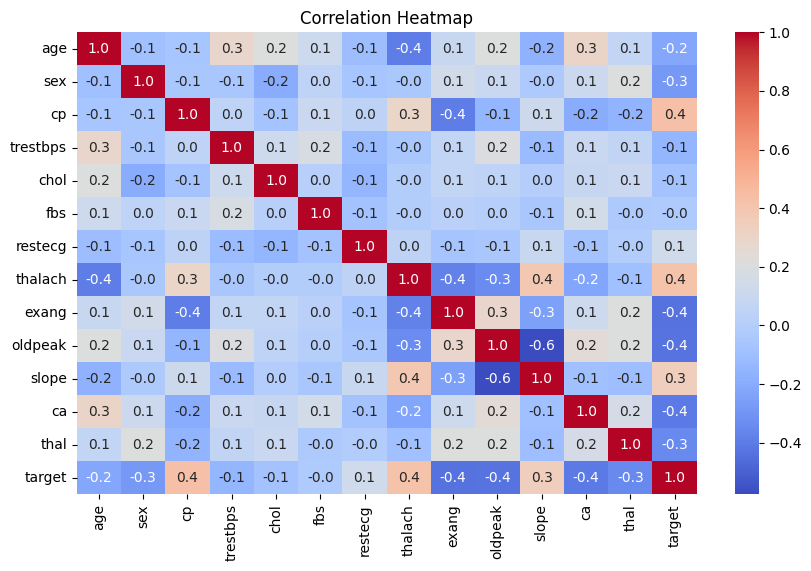

In [12]:
# -1 to +1
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df_new.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

#Data Visualization


In [15]:
#rename columns
df_new.rename(columns={'cp':'chest pain type', 'trestbps': 'resting blood pressure', 'chol': 'serum cholestoral',
                   'fbs': 'fasting blood sugar', 'restecg': 'resting electrocardiographic'
                   , 'thalach': 'maximum heart rate achieved', 'exang': 'exercise induced angina',
                    'ca': 'number of major vessels'}, inplace=True)
df_new.head()# check

<ipython-input-15-5ef616a066aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns={'cp':'chest pain type', 'trestbps': 'resting blood pressure', 'chol': 'serum cholestoral',


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate achieved,exercise induced angina,oldpeak,slope,number of major vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0




Plotting histogram



<ipython-input-16-656492401af9>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df_new.hist(ax=ax)


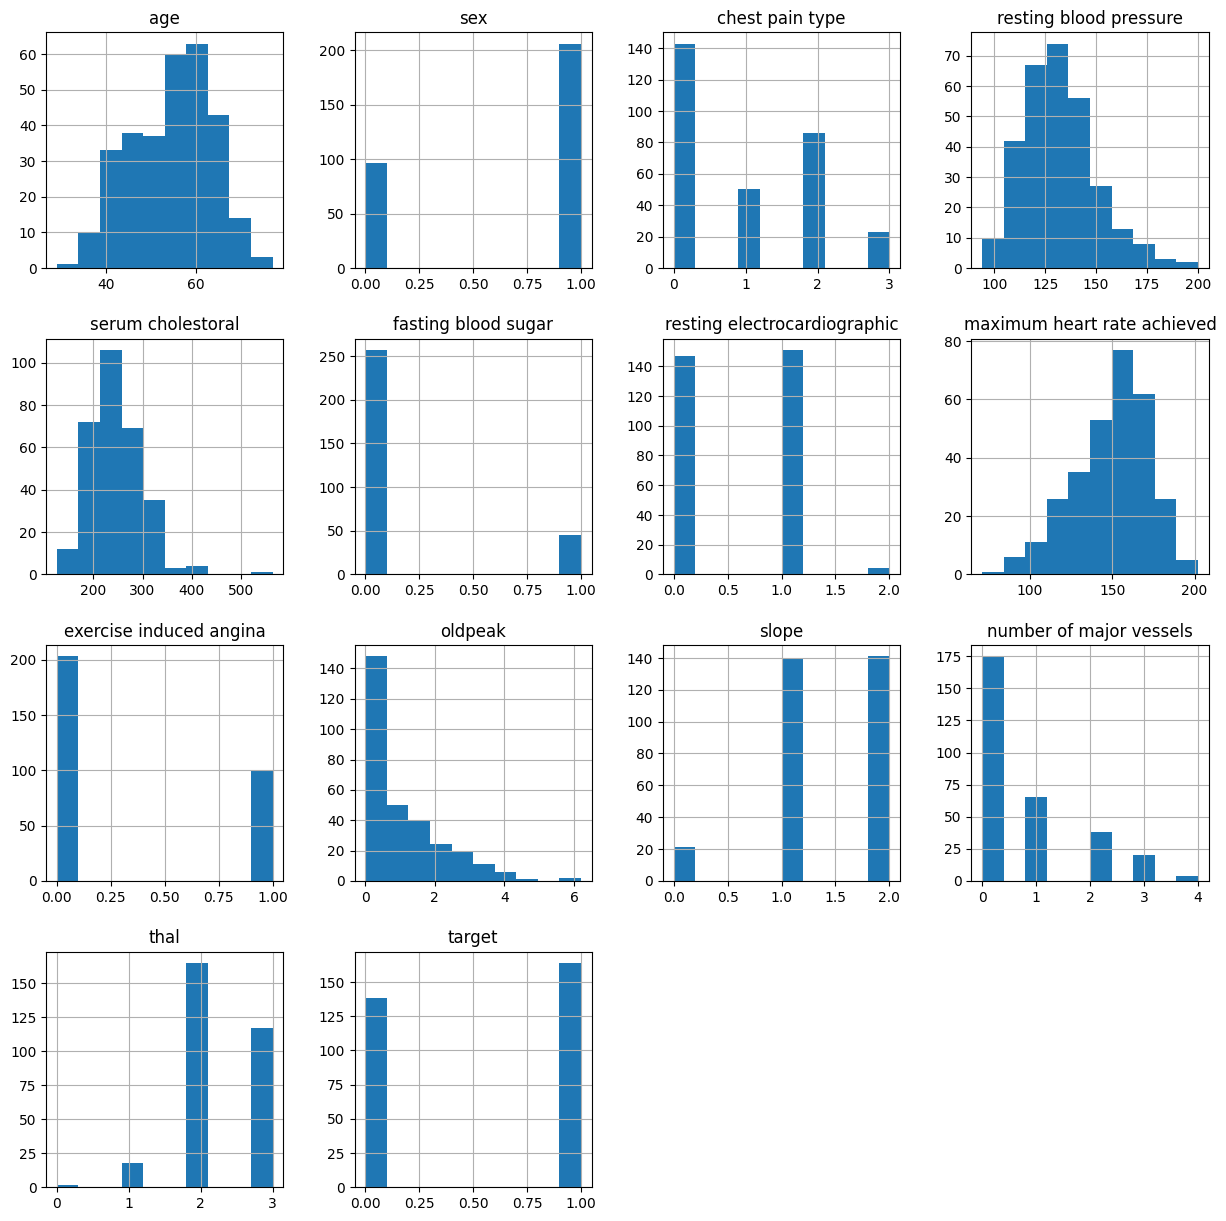

In [16]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df_new.hist(ax=ax)

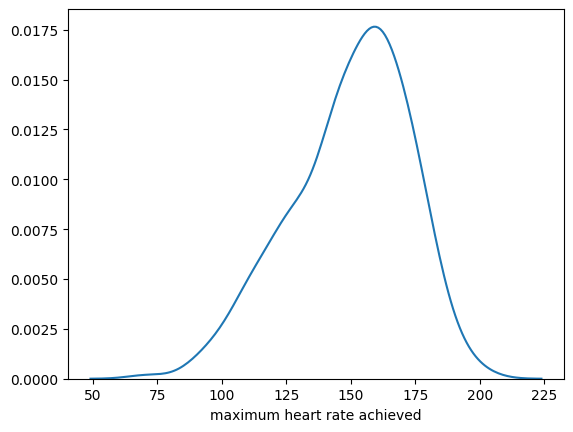

In [17]:
#The highest heart rate recorded for people with heart disease
df2 =df_new[df_new['target'] == 1]
sns.kdeplot(df_new['maximum heart rate achieved'])
plt.ylabel("")
plt.show()

boxplots

Text(0, 0.5, 'Count')

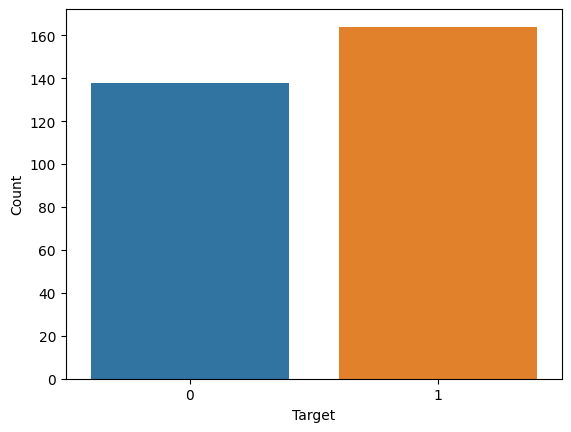

In [18]:
#Number of people with and without heart disease
g = sns.countplot(x='target', data=df_new)
plt.xlabel('Target')
plt.ylabel('Count')

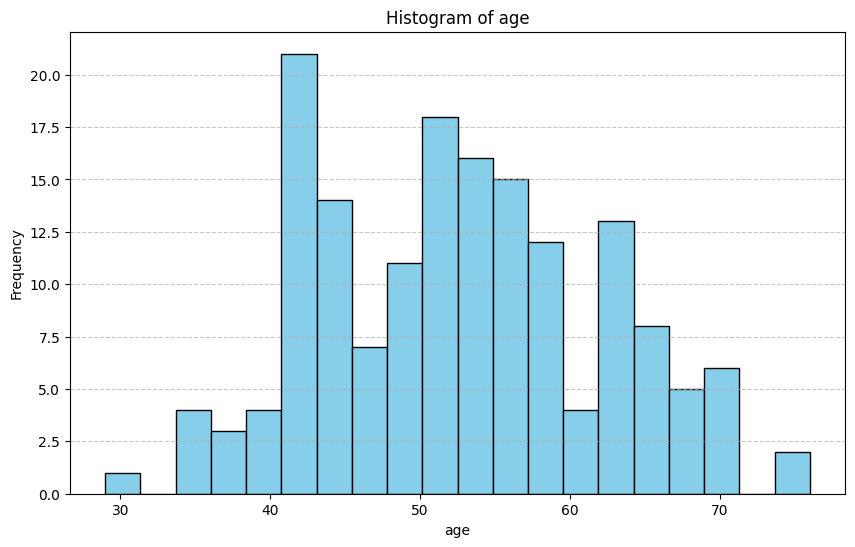

In [19]:
#Histogram showing the ages of people diagnosed with heart disease
df2 =df_new[df_new['target'] == 1]
plt.figure(figsize=(10, 6))
plt.hist(df2['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Building the ML Model


In [20]:
# Splitting the dataset into dependent and independent features
X = df_new.drop(columns='target', axis=1)
Y = df_new['target']

In [21]:
print(X)

     age  sex  chest pain type  resting blood pressure  serum cholestoral  \
0     52    1                0                     125                212   
1     53    1                0                     140                203   
2     70    1                0                     145                174   
3     61    1                0                     148                203   
4     62    0                0                     138                294   
..   ...  ...              ...                     ...                ...   
723   68    0                2                     120                211   
733   44    0                2                     108                141   
739   52    1                0                     128                255   
843   59    1                3                     160                273   
878   54    1                0                     120                188   

     fasting blood sugar  resting electrocardiographic  \
0                

In [22]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)


(302, 13) (241, 13) (61, 13)


Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation


In [28]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8464730290456431


In [29]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9016393442622951



Building a Predictive System

In [31]:
input_data = (43,1,0,150,247,0,1,171,0,1.5,2,0,2)
# (43,1,0,150,247,0,1,171,0,1.5,2,0,2) =1
# (62,0,0,140,268,0,0,160,0,3.6,0,2,2) = 0
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
